<center><h1 style = "color:black">Cálculo Numérico</h1>
    <h2>Avaliação 1.3</h2>
    <hr>
        <p style='text-align: justify;'>Aluno: Gabriel Brito Melandes
        <p>Curso: Ciência da Computação
        <p>Matricula: 171057600079
    </center>
    <hr>

<p><justify>
<h3>Imports</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from tabulate import tabulate

<hr><h3>Funções</h3><p style='text-align: justify;'>

In [2]:
header = ['k', 'ak', 'xk', 'bk', 'f(xk)', "|erro|"]
table = [] # tabela de preenchimento

In [3]:
def biss(f, a, b, TOL, N):
    i = 1
    fa = f(a)
    while (i <= N):
     # iteracao da bissecao
        p = a + (b-a)/2
        fp = f(p)
        fb = f(b)
     # condição de saída
        if ((fp*fa > 0) and ((fp*fb) > 0)):
            break
        # adicionando elementos na tabela
        table.append([i-1, a, p, b, fp, np.abs(b-a)])
        # condicao de parada
        if ((fp == 0) or (np.abs((b-a)/2) <= TOL)):
            return p
        # bissecta o intervalo
        i = i+1
        if (fa * fp > 0):
            a = p
            fa = fp
        else:
            b = p

In [4]:
def secante(f, x0, x1, TOL, qnt):
    erro = []
    for i in range(qnt):
        x2 = x1 - f(x1) * (x1 - x0) / float(f(x1) - f(x0))
        erro.append(abs(x2-x1))
        table.append([i,x0,x1,x2,f(x0),f(x1),f(x2),erro[i]])
        x0, x1 = x1, x2
        if erro[i] < TOL:
            return x1

<p style='text-align: justify;'> Para o método da <b>secante</b> e de o de <b>newton</b>, se o valor de aproximação substituido em $f(x)$ for menor que o erro tolerável, retorna o valor.

In [5]:
def newton(F, F_dev, x0, TOL, qnt):
    x = np.zeros(qnt)
    erro = []
    x[0] = x0
    for i in range (qnt):
        x[i] = x[i-1] - F(x[i-1])/F_dev(x[i-1])
        erro.append(abs(x[i]-x[i-1]))
        table.append([i, x[i-1], F(x[i-1]), x[i], erro[i]])
        if (erro[i]) < TOL:
            return x[i]

<h3>Exercícios</h3><hr><b>1.</b> <br><p style='text-align: justify;'> Crie uma função $f(x)$ que possua uma única raiz real $ξ$ tal que o Método da Bisseção não seja aplicável. Para organizar sua resposta, pense no seguinte:
<p style='text-align: justify;'>(a) Descreva sua $f(x)$ e qual é a raiz que seria aproximada.

In [6]:
def f(x):
    return x**2

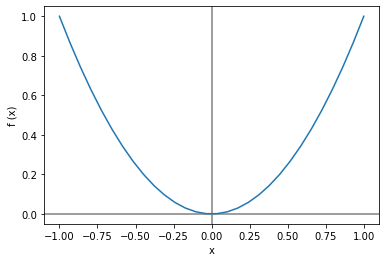

In [7]:
x = np.linspace(-1,1,30)
y = f(x)

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.xlabel('x')
plt.ylabel('f (x)')
plt.plot(x,y)


plt.show()

<p style='text-align: justify;'>Raiz é aproximadamente 0.

<p style='text-align: justify;'>(b) Demonstre que o método não converge para a solução do problema $f(ξ) = 0$

In [8]:
for i in range(-3, 3):
    if biss(f, i, i+1, 1e-4, 20):
        print("Raiz encontrada no intervalo [", i, ", ", i+1, "]\n")
        print(tabulate(table, header, tablefmt="github",
        numalign="center", floatfmt=".8f"))
    table = [] 

Raiz encontrada no intervalo [ -1 ,  0 ]

|  k  |     ak      |     xk      |  bk  |   f(xk)    |   |erro|   |
|-----|-------------|-------------|------|------------|------------|
|  0  | -1.00000000 | -0.50000000 |  0   | 0.25000000 | 1.00000000 |
|  1  | -0.50000000 | -0.25000000 |  0   | 0.06250000 | 0.50000000 |
|  2  | -0.25000000 | -0.12500000 |  0   | 0.01562500 | 0.25000000 |
|  3  | -0.12500000 | -0.06250000 |  0   | 0.00390625 | 0.12500000 |
|  4  | -0.06250000 | -0.03125000 |  0   | 0.00097656 | 0.06250000 |
|  5  | -0.03125000 | -0.01562500 |  0   | 0.00024414 | 0.03125000 |
|  6  | -0.01562500 | -0.00781250 |  0   | 0.00006104 | 0.01562500 |
|  7  | -0.00781250 | -0.00390625 |  0   | 0.00001526 | 0.00781250 |
|  8  | -0.00390625 | -0.00195312 |  0   | 0.00000381 | 0.00390625 |
|  9  | -0.00195312 | -0.00097656 |  0   | 0.00000095 | 0.00195312 |
| 10  | -0.00097656 | -0.00048828 |  0   | 0.00000024 | 0.00097656 |
| 11  | -0.00048828 | -0.00024414 |  0   | 0.00000006 | 0.000

<p style='text-align: justify;'>O ajuste feito no algorítmo do livro identifica que há uma raiz, porém o algorítimo nunca irá chegar no valor correto, zero (0), pois este ponto já foi tomado por a ou b, então o valor diferente da raiz sempre irá tentar se aproximar dele, mas sem sucesso. 

<hr><b>2.</b> <br><p style='text-align: justify;'> A proporção áurea $\phi$, também conhecida por número de ouro, é muito utilizada por questões estéticas. Está presente em várias obras artísticas, no padrão A4 e também no formato dos cartões de crédito. O valor do número φ é dado pela raiz da equação abaixo:
$$f(x) = x^2 − x − 1.$$
Analise o comportamento do erro relativo nos métodos da Bisseção, de Newton e da Secante ao determinar a raiz da equação acima com precisão de, no mínimo, $10^{−4}$</p>
.

<b>(a)</b> Descreva o funcionamento dos seus algoritmos indicando equações e condições iniciais. (não é necessário realizar em Python, pode ser via tabela também)


<p style='text-align: justify;'>Serão utilizadas funções das atividades anteriores, elas já foram informadas na introdução, na seção de Funções. Será <b>plotado o gráfico</b> da função e testado o intervalo baseado no <b>gráfico</b>.

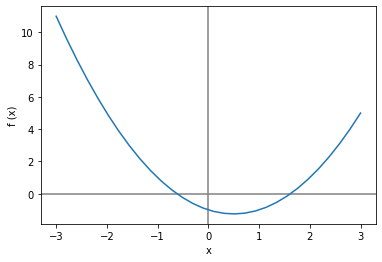

In [9]:
def f(x):
    return x**2 - x - 1
def f1(x):
    return 2*x-1

x = np.linspace(-3,3,30)
y = f(x)
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.xlabel('x')
plt.ylabel('f (x)')
plt.plot(x,y)
plt.show()

<b>(b)</b><p style='text-align: justify;'>
Realize a aproximação e calcule o erro relativo aproximado a cada iteração. Crie os gráficos do erro relativo aproximado por iteração. (podem ser os três gráficos num mesmo plano ou separados. Se não conseguir, coloque as três tabelas de erro por iteração.)

In [10]:
for i in range(-3, 3):
    if biss(f, i, i+1, 1e-4, 20):
        print("Raiz encontrada no intervalo [", i, ", ", i+1, "]\n")
        print(tabulate(table, header, tablefmt="github",
        numalign="center", floatfmt=".4f"))
    table = [] # zera tabela para não acumular

Raiz encontrada no intervalo [ -1 ,  0 ]

|  k  |   ak    |   xk    |   bk    |  f(xk)  |  |erro|  |
|-----|---------|---------|---------|---------|----------|
|  0  | -1.0000 | -0.5000 | 0.0000  | -0.2500 |  1.0000  |
|  1  | -1.0000 | -0.7500 | -0.5000 | 0.3125  |  0.5000  |
|  2  | -0.7500 | -0.6250 | -0.5000 | 0.0156  |  0.2500  |
|  3  | -0.6250 | -0.5625 | -0.5000 | -0.1211 |  0.1250  |
|  4  | -0.6250 | -0.5938 | -0.5625 | -0.0537 |  0.0625  |
|  5  | -0.6250 | -0.6094 | -0.5938 | -0.0193 |  0.0312  |
|  6  | -0.6250 | -0.6172 | -0.6094 | -0.0019 |  0.0156  |
|  7  | -0.6250 | -0.6211 | -0.6172 | 0.0069  |  0.0078  |
|  8  | -0.6211 | -0.6191 | -0.6172 | 0.0025  |  0.0039  |
|  9  | -0.6191 | -0.6182 | -0.6172 | 0.0003  |  0.0020  |
| 10  | -0.6182 | -0.6177 | -0.6172 | -0.0008 |  0.0010  |
| 11  | -0.6182 | -0.6179 | -0.6177 | -0.0003 |  0.0005  |
| 12  | -0.6182 | -0.6180 | -0.6179 | 0.0000  |  0.0002  |
| 13  | -0.6180 | -0.6180 | -0.6179 | -0.0001 |  0.0001  |
Raiz encontrad

In [11]:
header=['i', 'x(i-1)', 'F(x(i-1))', 'x(i)', 'erro']
if newton(f, f1, -1, 1e-4, 20):
    print(tabulate(table, header, tablefmt="github", numalign="center", floatfmt=".4f"))
table = []

|  i  |  x(i-1)  |  F(x(i-1))  |  x(i)   |  erro  |
|-----|----------|-------------|---------|--------|
|  0  |  0.0000  |   -1.0000   | -1.0000 | 1.0000 |
|  1  | -1.0000  |   1.0000    | -0.6667 | 0.3333 |
|  2  | -0.6667  |   0.1111    | -0.6190 | 0.0476 |
|  3  | -0.6190  |   0.0023    | -0.6180 | 0.0010 |
|  4  | -0.6180  |   0.0000    | -0.6180 | 0.0000 |


In [12]:
header=['i','x0','x1','x2','f(x0)','f(x1)','f(x2)','|erro|']
if secante(f, -3, -2, 1e-4, 20):
        print(tabulate(table, header, tablefmt="github",
        numalign="center", floatfmt=".4f"))
table=[]

|  i  |   x0    |   x1    |   x2    |  f(x0)  |  f(x1)  |  f(x2)  |  |erro|  |
|-----|---------|---------|---------|---------|---------|---------|----------|
|  0  | -3.0000 | -2.0000 | -1.1667 | 11.0000 | 5.0000  | 1.5278  |  0.8333  |
|  1  | -2.0000 | -1.1667 | -0.8000 | 5.0000  | 1.5278  | 0.4400  |  0.3667  |
|  2  | -1.1667 | -0.8000 | -0.6517 | 1.5278  | 0.4400  | 0.0764  |  0.1483  |
|  3  | -0.8000 | -0.6517 | -0.6205 | 0.4400  | 0.0764  | 0.0056  |  0.0312  |
|  4  | -0.6517 | -0.6205 | -0.6181 | 0.0764  | 0.0056  | 0.0001  |  0.0025  |
|  5  | -0.6205 | -0.6181 | -0.6180 | 0.0056  | 0.0001  | 0.0000  |  0.0000  |


<b>(c)</b> Analise o comportamento do erro.

<p style='text-align: justify;'>Para o método da secante e o método de Newton, veja que o erro está relacionado com o $f(x)$, para a secante o erro é equivalente a $f{(x2)}$, e para o método de Newton, $f{(x_{i-1})}$. Estes são selhantes pois quando mais a função se aproxima de zero, melhor é o valor calculado. Outro ponto de parada poderia ser o $f(x_{substituido}) \approx 0.$ O mesmo vale para o método da bisseção, porém sua leitura é mais simples e completa.

<p style='text-align: justify;'>É notório a quantidade de iterações necessárias para se alcançar o objetivo, os métodos de newton e secante são mais precisos e exigem menos poderio computacional, quando comparados com o método da bisseção.